In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn2_circles

In [2]:
GWAS_IBI_covered_stat = pd.read_csv('Additional File 6.csv', index_col=0)

In [3]:
### Find GWAS SNPs' Patient Coverage ###

_930_GWAS_SNPs_df = GWAS_IBI_covered_stat.copy()
_930_GWAS_SNPs_df = _930_GWAS_SNPs_df.sort_values('p-value')

count = 0
list_of_list = []
for i in _930_GWAS_SNPs_df.index.tolist():
    pvalue = _930_GWAS_SNPs_df.loc[i]['p-value']
    count = count + _930_GWAS_SNPs_df.loc[i]['#HTN Patients explained']
    patient_cover = count
    _all = [i, pvalue, patient_cover]
    list_of_list.append(_all)

pvalue_threshold = pd.DataFrame(list_of_list)
pvalue_threshold.columns = ['SNP', 'p_value', 'Patient_coverage']

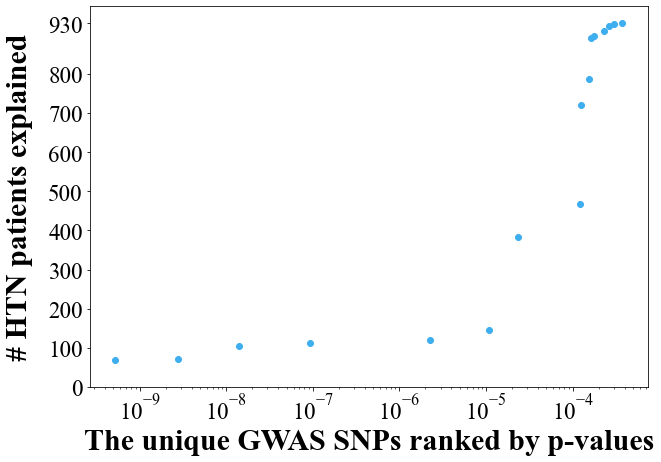

In [4]:
### Figure 4a ##

import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(10,7))
colors = ['#ee3f65', '#3faeee']
ax = plt.scatter(pvalue_threshold['p_value'].tolist(), pvalue_threshold['Patient_coverage'].tolist(),  marker='o', color=colors[1])
labels = [0,100,200,300,400,500,600,700,800,930]
plt.yticks(labels, labels, fontname="Times New Roman", size=23)
plt.ylabel('# HTN patients explained', labelpad=15,  fontname="Times New Roman", size=30,fontweight="bold")
plt.xticks(fontname="Times New Roman", size=23,fontweight="regular")
plt.xlabel('The unique GWAS SNPs ranked by p-values', fontname="Times New Roman", size=30,fontweight="bold")
plt.xscale('log')

In [6]:
GWAS_IBI_covered_stat = pd.read_csv('Additional File 5.csv', index_col=0)

In [8]:
### Find IBI SNPs' Patient Coverage ###

_930_GWAS_SNPs_df = GWAS_IBI_covered_stat.copy()
_930_GWAS_SNPs_df = _930_GWAS_SNPs_df.sort_values('Ms,r', ascending=False)

count = 0
list_of_list = []
for i in _930_GWAS_SNPs_df.index.tolist():
    marginal = _930_GWAS_SNPs_df.loc[i]['Ms,r']
    count = count + _930_GWAS_SNPs_df.loc[i]['#HTN Patients explained']
    patient_cover = count
    _all = [i, marginal, patient_cover]
    list_of_list.append(_all)

ibi_threshold = pd.DataFrame(list_of_list[1:])
ibi_threshold.columns = ['SNP', 'marginal', 'Patient_coverage']
ibi_threshold['marginal_reverse'] = -1*ibi_threshold['marginal']

Text(0.5, 0, 'The unique IBI SNPs ranked by Ms,r values')

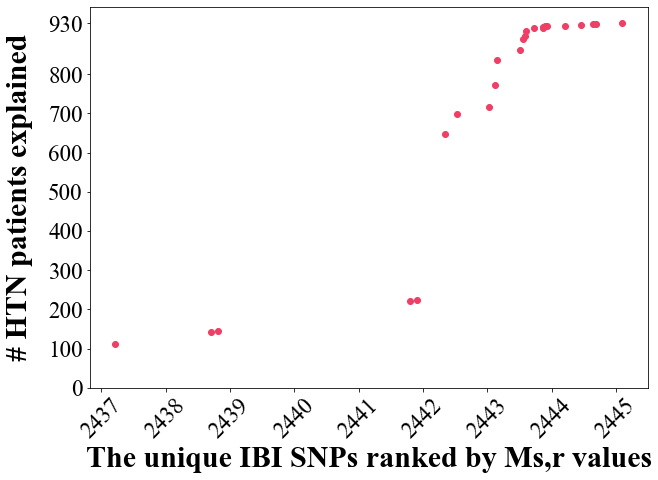

In [9]:
### Figure 4b ##

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))
colors = ['#ee3f65', '#3faeee']
ax = plt.scatter(ibi_threshold['marginal_reverse'].tolist(), ibi_threshold['Patient_coverage'].tolist(),  marker='o', color=colors[0])
labels = [0,100,200,300,400,500,600,700,800,930]
plt.yticks(labels, labels, fontname="Times New Roman", size=23)
plt.ylabel('# HTN patients explained', labelpad=15,  fontname="Times New Roman", size=30,fontweight="bold")
plt.xticks(rotation=45, fontname="Times New Roman", size=23,fontweight="regular")
plt.xlabel('The unique IBI SNPs ranked by Ms,r values', fontname="Times New Roman", size=30,fontweight="bold")

In [10]:
### File has individual's Posterior  Probability information, it is not shared ###

GWAS_IBI_covered_stat = pd.read_csv('HTNpatient_both_ICI_and_GWAS_Covered_SNPs_v5.csv', index_col=0)

Text(0, 0.5, '# HTN patients explained')

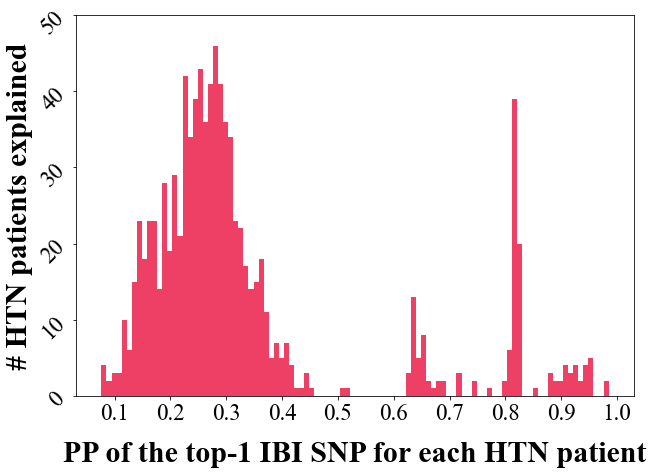

In [11]:
### Figure 4c ##

IBI_SNPs_PP_df = GWAS_IBI_covered_stat.copy()
IBI_SNPs_PP_df = IBI_SNPs_PP_df.sort_values('IBI-SNP_PP') # Sort values by IBI SNPs posterior probability values
IBI_SNPs_PP_df = IBI_SNPs_PP_df.reset_index()

plt.figure(figsize=(10,7))
IBI_SNPs_PP_df['IBI-SNP_PP'].hist(grid=False, bins=100, color=colors[0])
labels = [0,10,20,30,40,50]
label2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.xticks(label2, label2, fontname="Times New Roman", size=23)
plt.xlabel('PP of the top-1 IBI SNP for each HTN patient',  labelpad=17,  fontname="Times New Roman", size=30,fontweight="bold")
plt.yticks(labels, labels, rotation=45, fontname="Times New Roman", size=23,fontweight="regular")
plt.ylabel('# HTN patients explained', fontname="Times New Roman", size=30,fontweight="bold")